## Time Series plot of COVID-19 confirmed cases and deaths

by survivor (twitter: @survivor7777777)

### Log plot of confirmed cases and deaths for the top 30 countries

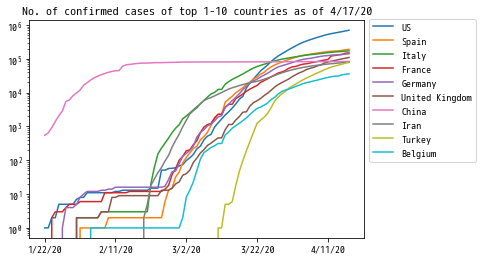

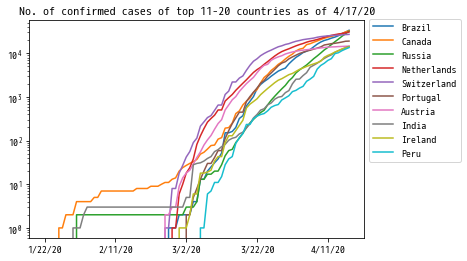

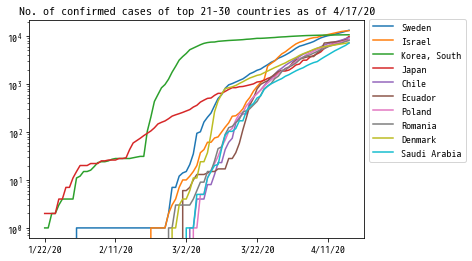

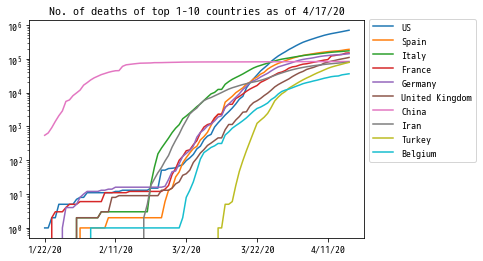

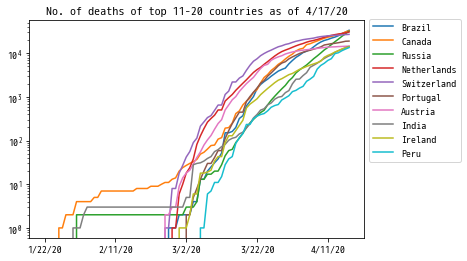

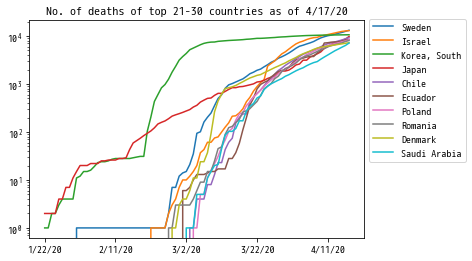

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

csse_base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

def read_csse_data(file):
    url = csse_base_url + file
    df = pd.read_csv(url)
    df = df.drop(columns=["Lat", "Long"])
    df = df.groupby("Country/Region").sum()
    return df

def plot_rank_range(df_ranked, title, begin, end):
    df = df_ranked[begin:end]
    last_date = df.columns[-1]
    title = '{0} of top {1}-{2} countries as of {3}'.format(title, begin+1, end, last_date)
    t = df_ranked[begin:end].T
    t.plot(logy=True, title=title).legend(bbox_to_anchor=(1, 1.03), loc='upper left')

df_confirmed = read_csse_data('time_series_covid19_confirmed_global.csv')
df_deaths = read_csse_data('time_series_covid19_deaths_global.csv')

df_confirmed_ranked = df_confirmed.sort_values(df_confirmed.columns[-1], ascending=False)
df_deaths_ranked = df_confirmed.sort_values(df_deaths.columns[-1], ascending=False)

plot_rank_range(df_confirmed_ranked, "No. of confirmed cases", 0, 10)
plot_rank_range(df_confirmed_ranked, "No. of confirmed cases", 10, 20)
plot_rank_range(df_confirmed_ranked, "No. of confirmed cases", 20, 30)

plot_rank_range(df_deaths_ranked, "No. of deaths", 0, 10)
plot_rank_range(df_deaths_ranked, "No. of deaths", 10, 20)
plot_rank_range(df_deaths_ranked, "No. of deaths", 20, 30)

## Log plot of time series aligned at the date when exceeds a specified number

It is difficult to compare the infection rate of each country because the start date of infection varies from country to country.
To overcome the problem, let the time series plots aligned at the date when the number of cases exceeds a certain number.

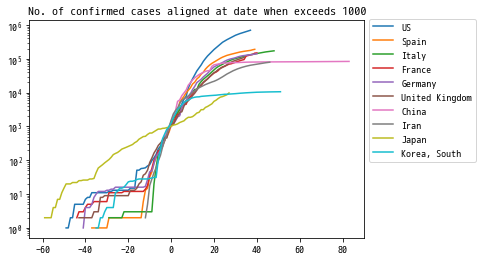

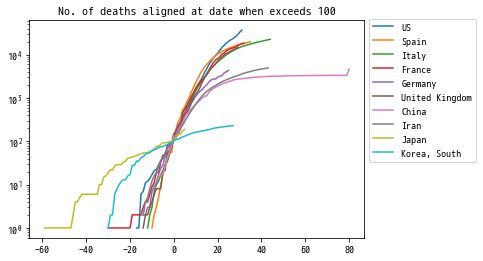

In [2]:
def align_time_series(input_df, align_at):
    last_date = input_df.columns[-1]
    input_df = input_df[(input_df[last_date] > align_at)]
    index_shift = {}
    for i, country in enumerate(input_df.index):
        for j, date in enumerate(input_df.columns):
            if input_df.iat[i, j] >= align_at:
                index_shift[i] = j
                break
    num_columns = len(input_df.columns)
    aligned_df = pd.DataFrame(index=input_df.index, columns=range(-num_columns, num_columns))
    for i, country in enumerate(input_df.index):
        for j, date in enumerate(input_df.columns):
            if input_df.iat[i, j] > 0:
                aligned_df.at[country, j-index_shift[i]] = input_df.iat[i, j]
    return aligned_df

selected_countries = list(df_confirmed_ranked[0:8].index) + ['Japan', 'Korea, South']

df_confirmed_selected = df_confirmed.loc[selected_countries, :]
df_deaths_selected = df_deaths.loc[selected_countries, :]

def plot_aligned(df, title, align_at):
    t = align_time_series(df, align_at).T
    t.plot(logy=True, title=title).legend(bbox_to_anchor=(1, 1.03), loc='upper left')

plot_aligned(df_confirmed_selected, "No. of confirmed cases aligned at date when exceeds {}".format(1000), 1000)
plot_aligned(df_deaths_selected, "No. of deaths aligned at date when exceeds {}".format(100), 100)

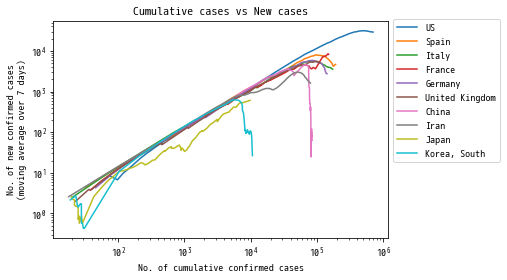

In [3]:
def plot_case_trajectory(df, countries, window=7):
    fig, ax = plt.subplots()
    plt.xscale('log')
    plt.yscale('log')
    for c in countries:
        x = df.loc[c]
        y = x.diff().rolling(window).mean()
        for i, v in enumerate(y):
            if v >= 2:
                cut = i
                break
        x = x[cut:]
        y = y[cut:]
        ax.plot(x, y)
    ax.legend(countries, bbox_to_anchor=(1, 1.03), loc='upper left')
    ax.set_xlabel('No. of cumulative confirmed cases')
    ax.set_ylabel('No. of new confirmed cases\n(moving average over {} days)'.format(window))
    ax.set_title('Cumulative cases vs New cases')
    plt.show()

plot_case_trajectory(df_confirmed, selected_countries)

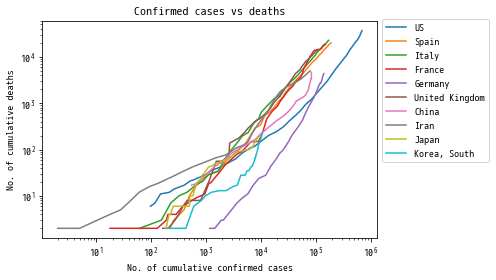

In [4]:
def plot_confirmed_vs_deaths(countries):
    fig, ax = plt.subplots()
    plt.xscale('log')
    plt.yscale('log')
    for c in countries:
        x = df_confirmed.loc[c]
        y = df_deaths.loc[c]
        for i, v in enumerate(y):
            if v >= 2:
                cut = i
                break
        x = x[cut:]
        y = y[cut:]
        ax.plot(x, y)
    ax.legend(countries, bbox_to_anchor=(1, 1.03), loc='upper left')
    ax.set_xlabel('No. of cumulative confirmed cases')
    ax.set_ylabel('No. of cumulative deaths')
    ax.set_title('Confirmed cases vs deaths')
    plt.show()

plot_confirmed_vs_deaths(selected_countries)